<a href="https://colab.research.google.com/github/9kitsune/pi-g/blob/master/pi_g_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas and Numpy 
Data analysis for Column monitoring
Upload 


In [3]:
#import csv data file
from google.colab import files
uploaded = files.upload()


Saving slog-2019-03-19_09_54.csv to slog-2019-03-19_09_54.csv


In [0]:
pip install bokeh

In [0]:
#load csv into dataframe, Set DateTimeIndex on timestamp, put data into 15sec bins
import pandas as pd
import numpy as np
import io

slog = pd.read_csv(io.BytesIO(uploaded['slog-2019-03-19_09_54.csv']))

slog = slog.set_index(pd.DatetimeIndex(slog['timestamp']))

slog.resample('15S').mean()

#split the dataframe into xyz array only
xyz = np.split(slog, [3], axis=1)

xyz[0]

#put xyz back into a dataframe
df_xyz = pd.DataFrame(xyz[0])

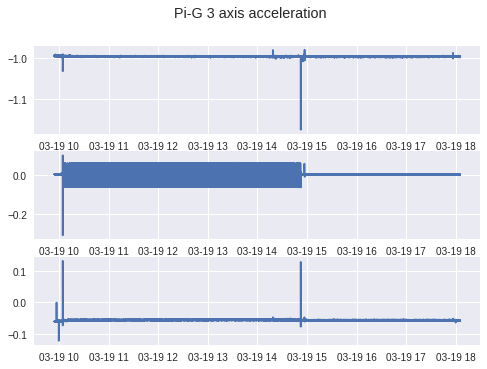

In [11]:
### use matplotlib to plot 3x plots ###

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()

X = df_xyz[["accel_x"]]
Y = df_xyz[["accel_y"]]
Z = df_xyz[["accel_z"]]

plt.subplot(311)
plt.plot(X)

plt.subplot(312)
plt.plot(Y)

plt.subplot(313)
plt.plot(Z)

plt.suptitle('Pi-G 3 axis acceleration')
plt.show()



In [0]:
# select top 50 rows for easier modelling.
top50 = df_xyz.head(n=50)

top50

In [30]:
#Bokeh visualisation

from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

output_file('chart.html')
output_notebook()
p = figure()

X = top50[["accel_x"]]
Y = top50[["accel_y"]]
Z = top50[["accel_z"]]

group = top50.groupby(('timestamp'))
source = ColumnDataSource(group)

p.circle(x=X, y=Y, color='red', legend='circle')

show(p)



Loading BokehJS ...